In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import pydotplus
from IPython.display import Image
pd.set_option('max_rows', 5)
%matplotlib inline

## モデル改善手段の検討順
---
過学習・未学習の判断や対処法の検討順の例を以下に示す。

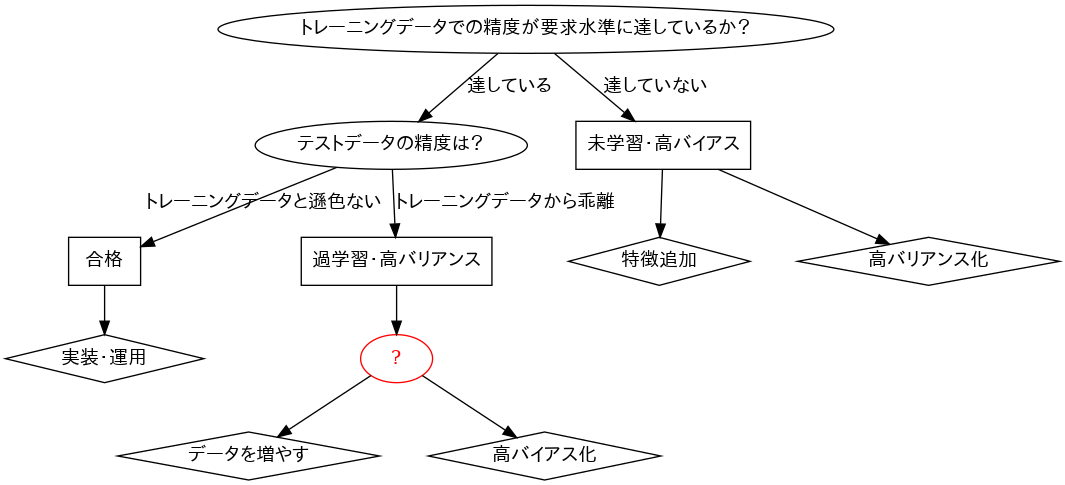

In [2]:
graph = pydotplus.graphviz.graph_from_dot_file('./dot/flow_chart.dot')
Image(graph.create_png())

## 学習データ収集の問題点
---
上のモデル改善手段の中でも、学習データの追加は一般的に費用や時間がかかる。そのため、精度が上がらない理由がデータ不足にあるかどうか事前に把握できると便利。 (学習データが少ないうちは最も効率がよい場合もある)

<table class="border text-center">
    <tr class="background-bright">
        <th>データとモデルの複雑さの関係</th>
        <th>現象</th>
        <th>対処法</th>
        <th>具体例</th>
    </tr>
    <tr class="background-dark">
        <td rowspan="2">データの複雑さ < モデルの複雑さ</td>
        <td rowspan="2">過学習</td>
        <td>データの複雑さを上げる<br />(データに含まれる情報を増やす)</td>
        <td class="text-left">
            <ul>
                <li><span style="color: red;">学習データを増やす</span></li>
            </ul>
        </td>
    </tr>
    <tr class="background-dark">
        <td>モデルの複雑さを下げる</td>
        <td class="text-left">
            <ul>
                <li>正則化</li>
                <li>パラメータを減らす</li>
                <li>高バイアスなモデルに変更する</li>
            </ul>
        </td>
    </tr>
    <tr class="background-dark">
        <td rowspan="2">データの複雑さ > モデルの複雑さ</td>
        <td rowspan="2">未学習</td>
        <td>データの複雑さを下げる<br />(モデルが理解しやすい形のデータにする)</td>
        <td class="text-left">
            <ul>
                <li>前処理 (特徴変形)</li>
            </ul>
        </td>
    </tr>
    <tr class="background-dark">
        <td>モデルの複雑さを上げる</td>
        <td class="text-left">
            <ul>
                <li>パラメータを増やす</li>
                <li>高バリアンスなモデルに変更する</li>
            </ul>
        </td>
    </tr>
</table>

学習データを増やすべきかどうかの判断材料として利用できる方法の 1 つとして学習曲線を扱う。

## 学習曲線 (learning curve)
---
横軸に学習に使用したサンプルサイズ・縦軸に精度や損失などの指標をとって、サンプルサイズの変化に伴う指標の変化を表示したグラフ。  
データを追加したときにモデルが改善しそうかどうかの判断材料になる。 (テストデータでの精度が改善傾向 = 過学習が改善傾向ならデータ追加でモデルが改善する可能性がある)

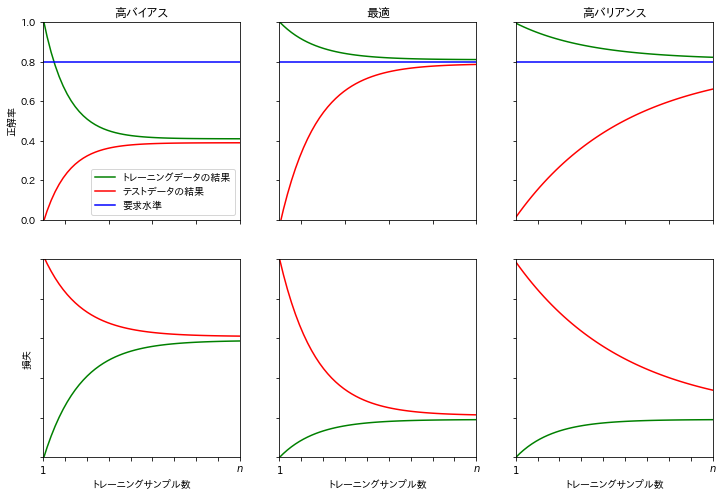

In [3]:
from helpers.improvement_process import learning_curve_comparison
learning_curve_comparison.show()

### Pythonでの学習曲線表示方法
---
`sklearn.model_selection.learning_curve`を使用する。

In [4]:
loader = load_breast_cancer()
cancer = pd.DataFrame(np.column_stack([loader.data, loader.target]), columns=list(loader.feature_names)+['target'])
cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.3514,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.0000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [5]:
x = cancer.iloc[:, :-1]
y = cancer.iloc[:, -1].astype(int)
model = LogisticRegression()

In [6]:
learning_curve??

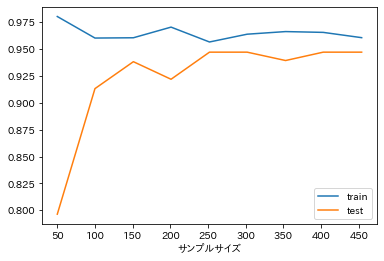

In [7]:
n, train, test = learning_curve(model,
                                x,
                                y,
                                train_sizes=np.linspace(0, 1, 10)[1:],
                                cv=5,
                                n_jobs=-1,
                                random_state=1234)
plt.plot(n, np.median(train, axis=1), label='train')
plt.plot(n, np.median(test, axis=1), label='test')
plt.legend()
plt.xlabel('サンプルサイズ')
plt.show()